# Census Income Project

### Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Importing Libraries

In [1]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

The dataset is the details of annual income of a person. Dataset has total 32560 rows and 15 columns and has both numerical and catagorical column. We need to predict the whether annual income of a person is over $50K or not, so this terms to be a Classification problem.

## Exploratory Data Analysis (EDA)

In [4]:
# To get overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From above dataset, we can see 6 columns have integer data types while 9 column having object datatypes. We need to apply encoding technique to change the object datatypes to numeric value. There seems to be no null values in our data set.

In [3]:
#Let's drop any duplicates
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(32536, 15)

Total 24 duplicate values deleted.

In [7]:
#Checking the unique values in each column
df.nunique().to_frame("Unique Values")

,Unique Values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [4]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print("*"*60)

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
************************************************************
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
************************************************************
123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
************************************************************
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-

In above value count, we can '?' on 3 columns "Workclass", "Occupation" and "Native_country". We need to replace ? with some name. 

Also we can see value of Capital_gain and Capital_loss is 0 for around 90% of data, so we will drop these 2 column

In [5]:
df.drop('Capital_gain', axis=1, inplace=True)

In [6]:
df.drop('Capital_loss', axis=1, inplace=True)

In [7]:
#Replacing '?' with name
df['Workclass'].replace({' ?':' Other-Working-Class'},inplace=True)
df['Occupation'].replace({' ?':' Other-Occupation'},inplace=True)
df['Native_country'].replace({' ?':' Others'},inplace=True)

In [13]:
# Checking count of null values from the dataset.
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

From above, we can see that there are no missing values in the dataset.

<AxesSubplot:>

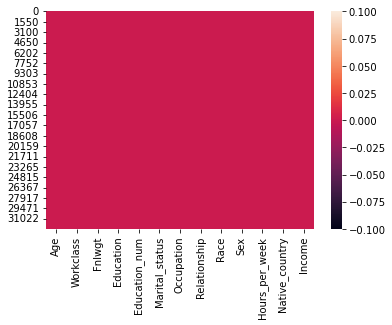

In [14]:
# Let's visualize the null values clearly through Heatmap
sns.heatmap(df.isnull())

In [16]:
# Statistical summary of dataset
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,40.440343
std,13.638193,1.055563e+05,2.571622,12.347079
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


Above is the descriptive statistics of the dataset. There is no negative value in our dataset and looks perfect.

Now Let's separate the Numerical and Catagorical columns

In [8]:
Catg_data = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        Catg_data.append(x)
Catg_data

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

Above are the 9 object type data

In [9]:
Num_data = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64':
        Num_data.append(x)
Num_data

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']

Above are the 4 numerical data

### Data Visualisation

##### Univariate Analysis

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


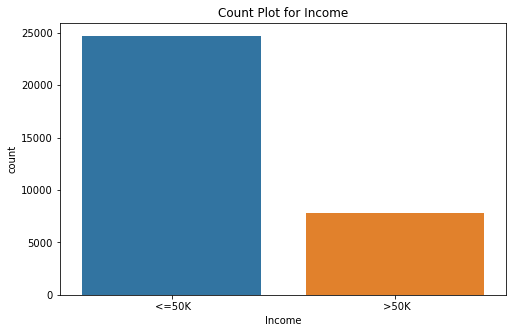

In [20]:
#Checking the count plot of income
print(df["Income"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df["Income"])
plt.title(f"Count Plot for Income")
plt.show()

Majority of the persons income is less than 50K. The data is not balanced and we need to balance the data at later stage

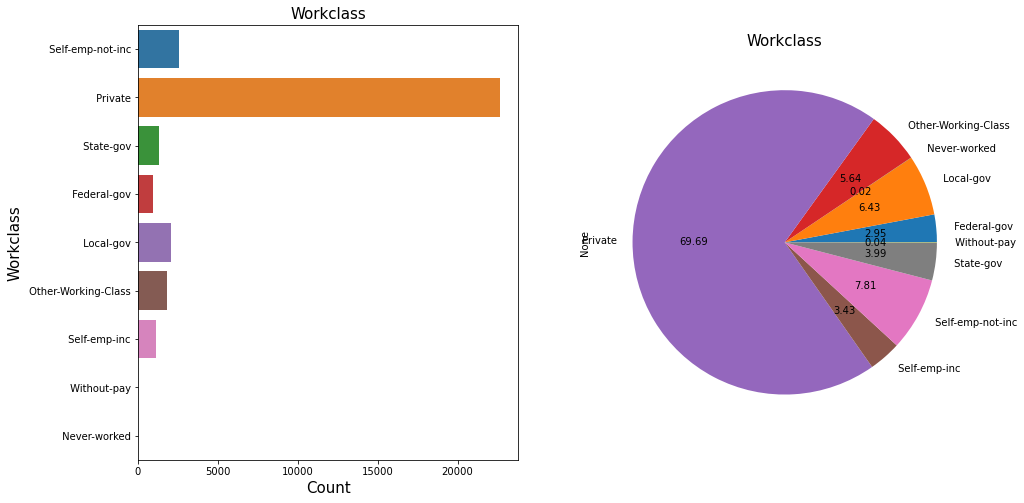

In [22]:
#Count and Pie plot for Workclass
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=df['Workclass'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Workclass', fontsize=15 )
plt.title('Workclass', fontsize=15)
plt.subplot(1,2,2)
df.groupby('Workclass').size().plot(kind='pie', autopct='%.2f')
plt.title('Workclass', fontsize=15)
plt.show()

From above plot, we can see that most of the people are Private sector employee

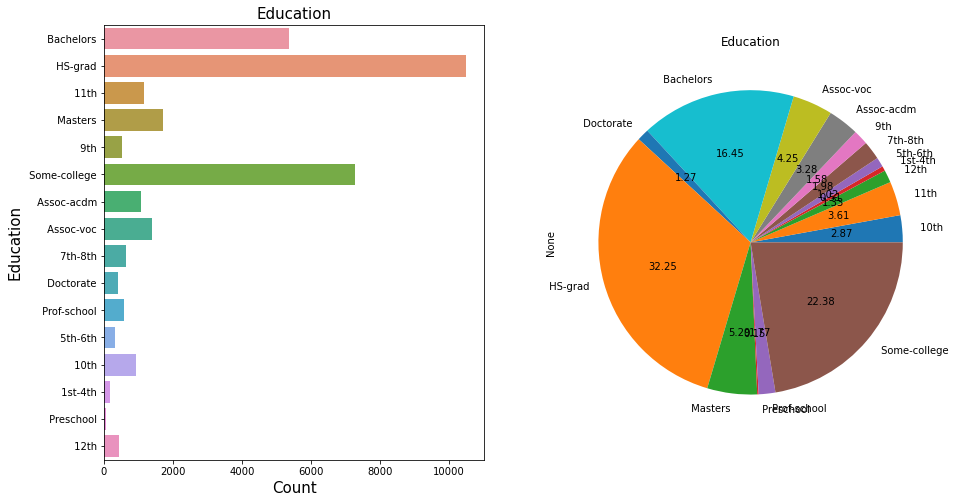

In [26]:
#Count plot for Education
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(y=df['Education'])
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Education', fontsize=15 )
plt.title('Education', fontsize=15)

plt.subplot(1,2,2)
df.groupby('Education').size().plot(kind='pie', autopct='%.2f')
plt.title('Education', fontsize=12)
plt.show()

32.25% population is HS-grad, only 1.27% of the population is doctrate.

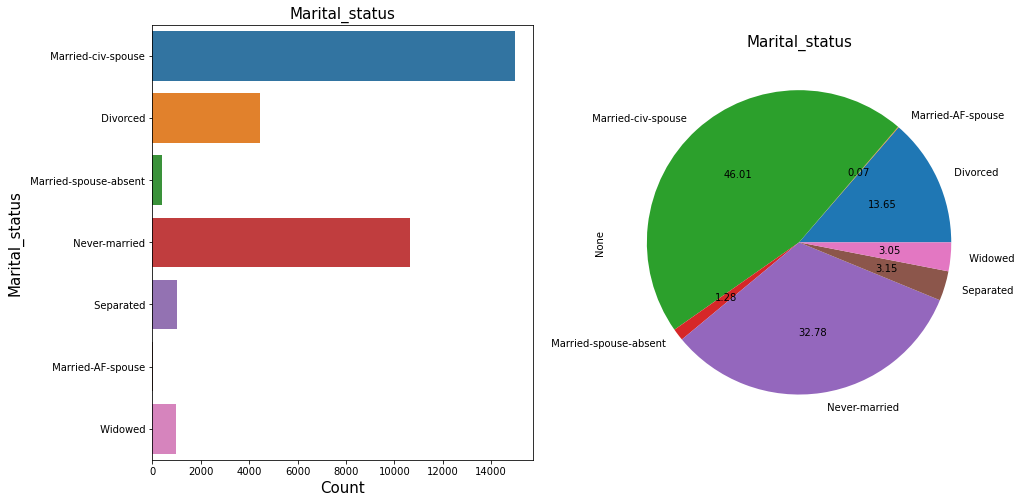

In [27]:
#Count plot for Martial Status
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y=df['Marital_status'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Marital_status', fontsize=15 )
plt.title('Marital_status', fontsize=15)

plt.subplot(1,2,2)
df.groupby('Marital_status').size().plot(kind='pie', autopct='%.2f')
plt.title('Marital_status', fontsize=15)
plt.show()

Married-civ-spouse people are highest in number followed by Never-married.

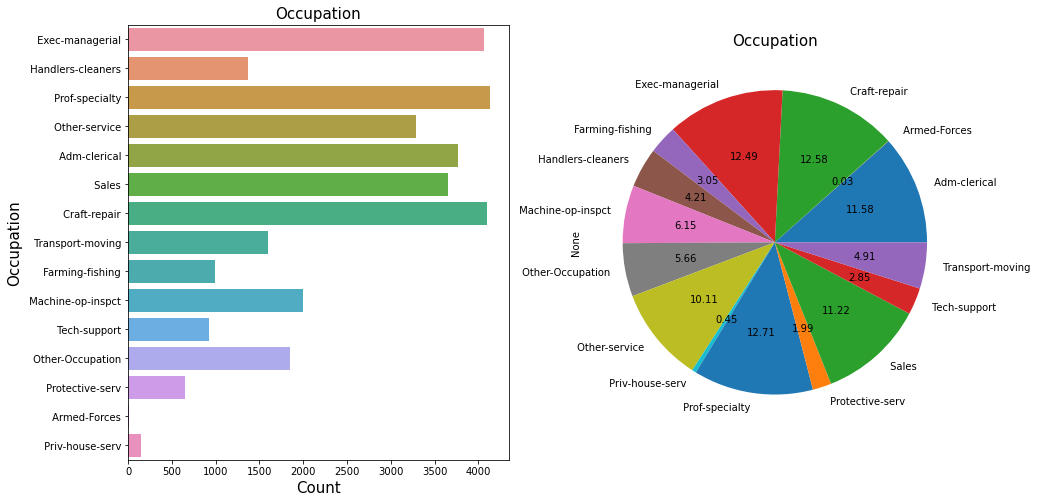

In [28]:
#Count plot for Occupation
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(y=df['Occupation'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Occupation', fontsize=15 )
plt.title('Occupation', fontsize=15)

plt.subplot(1,2,2)
df.groupby('Occupation').size().plot(kind='pie', autopct='%.2f')
plt.title('Occupation', fontsize=15)
plt.show()

Prof-speciality have highest count and the people in the position Armed-Forces have very least counts.

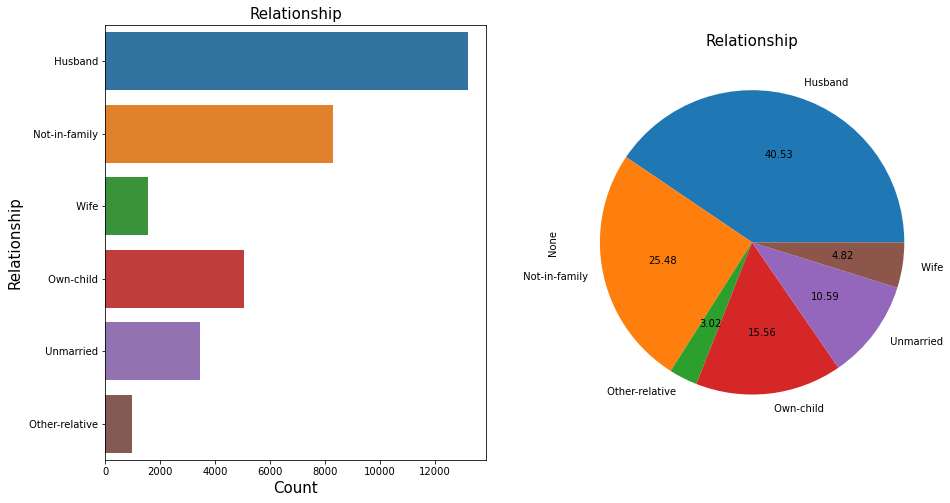

In [29]:
#Count plot of Relationship
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(y=df['Relationship'])
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Relationship', fontsize=15 )
plt.title('Relationship', fontsize=15)

plt.subplot(1,2,2)
df.groupby('Relationship').size().plot(kind='pie', autopct='%.2f')
plt.title('Relationship', fontsize=15)
plt.show()

Around 40% catagory of the Husband. There are around 25% Not in family.

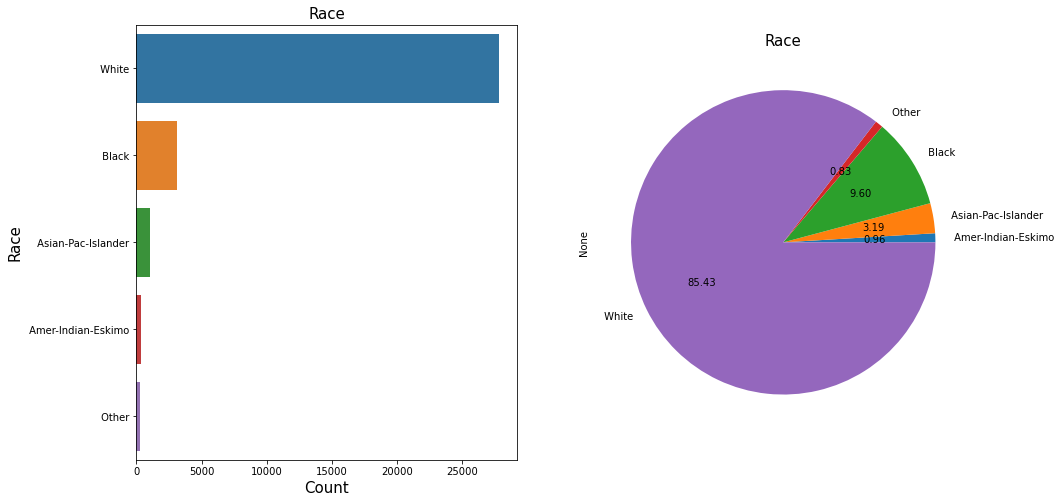

In [30]:
#Count plot of Race

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(y=df['Race'])
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Race', fontsize=15 )
plt.title('Race', fontsize=15)

plt.subplot(1,2,2)
df.groupby('Race').size().plot(kind='pie', autopct='%.2f')
plt.title('Race', fontsize=15)
plt.show()

Around 86% are WHite catagory and only 9.60% are Black

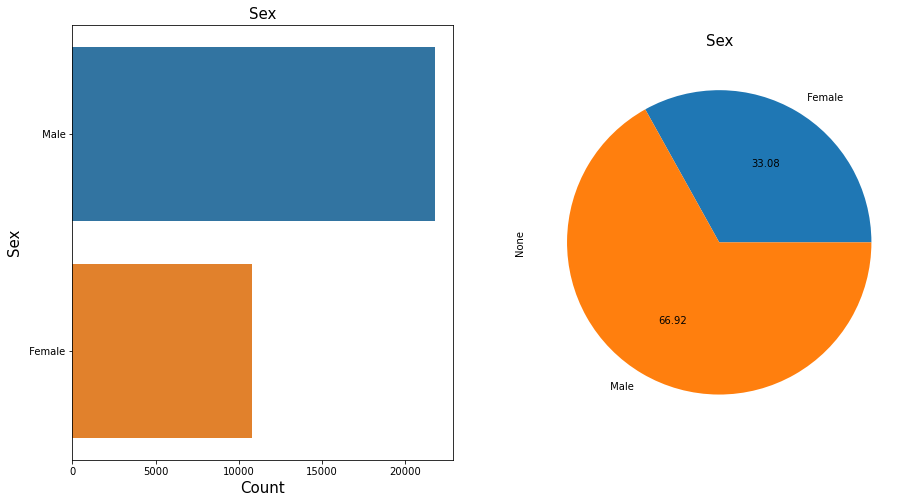

In [31]:
#Count plot of Sex

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.countplot(y=df['Sex'])
plt.xlabel('Count', fontsize=15 )
plt.ylabel('Sex', fontsize=15 )
plt.title('Sex', fontsize=15)

plt.subplot(1,2,2)
df.groupby('Sex').size().plot(kind='pie', autopct='%.2f')
plt.title('Sex', fontsize=15)
plt.show()

Around 67% count is of Male. Female worker are less in number

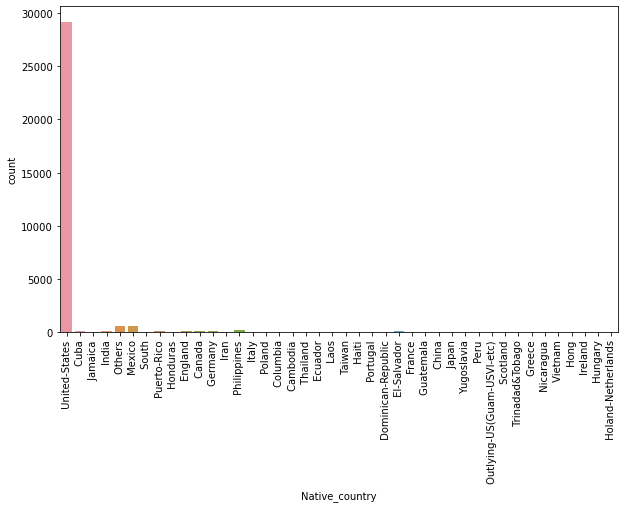

In [32]:
# Count plot of Native country of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Native_country"])
plt.xticks(rotation=90)
plt.show()

More than 90% are from United-States.

##### Bivariate Analysis

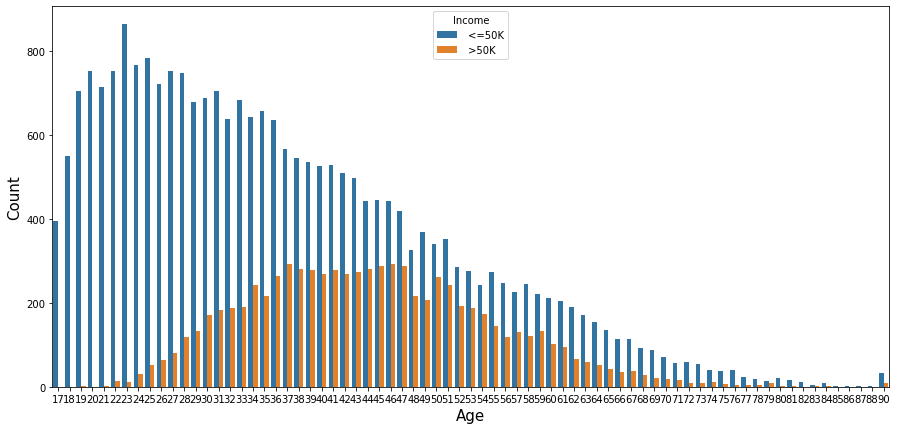

In [36]:
# Visualizing the age of the people with respect to income
plt.figure(figsize=(15,7))
sns.countplot(df['Age'], hue='Income', data= df)
plt.xlabel('Age', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

From above plot we can see that income >50K is of between 30 to 55 yrs people. 

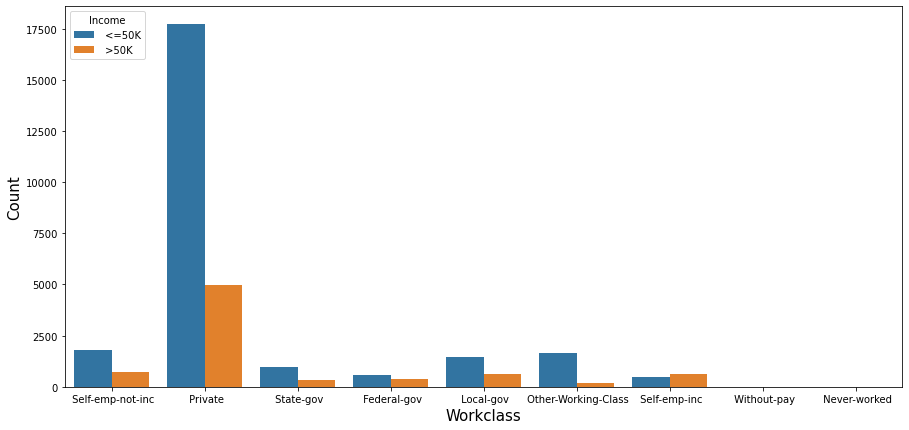

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(df['Workclass'], hue='Income', data= df)
plt.xlabel('Workclass', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

We have max population working in Private setor whose income income is <=50K per year.
At same time pepole working in private sector are more as compared to other setcor, whose income is >=50K per year.

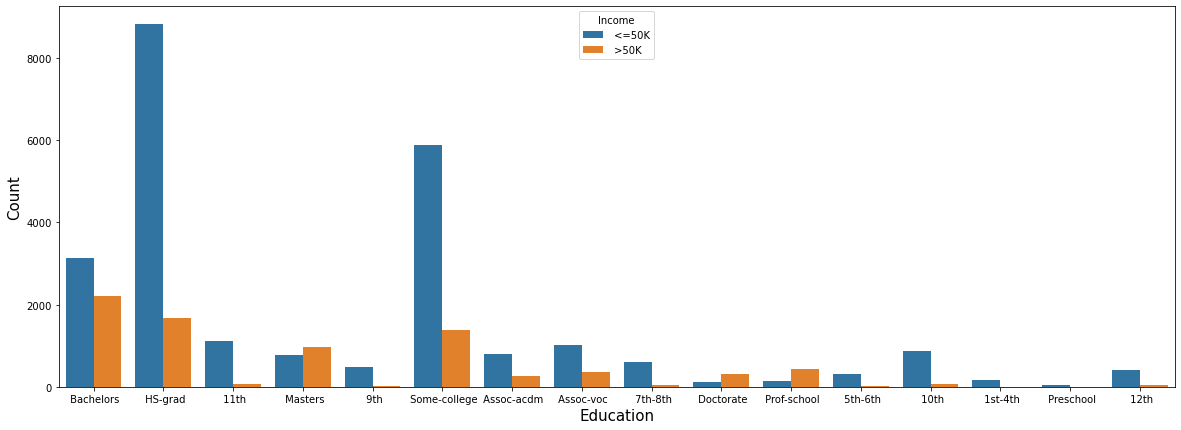

In [39]:
plt.figure(figsize=(20,7))
sns.countplot(df['Education'], hue='Income', data= df)
plt.xlabel('Education', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

Population with higher education have high chances of earning >50K

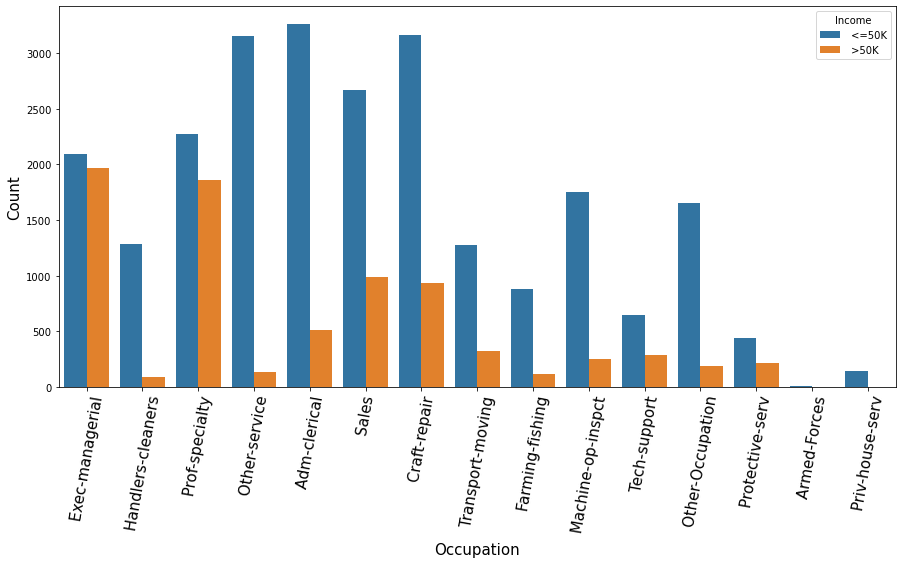

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(df['Occupation'], hue='Income', data= df)
plt.xlabel('Occupation', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

Occupation like Exce-managerial and Prof-specialty having higher population with income >=50K

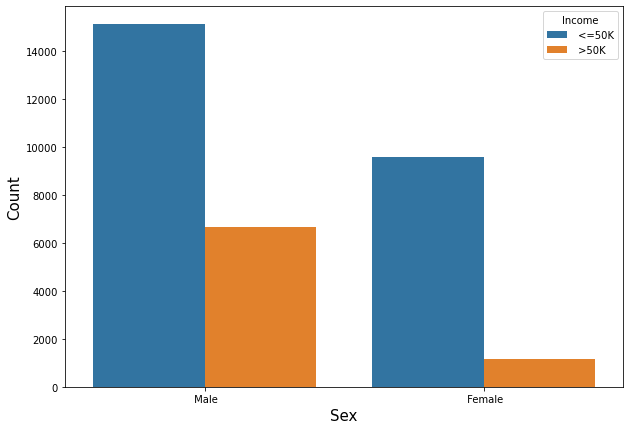

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(df['Sex'], hue='Income', data= df)
plt.xlabel('Sex', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()


We can see Male population is having highher count as compared to Female, for income>=50K

##### Multivariate Analysis

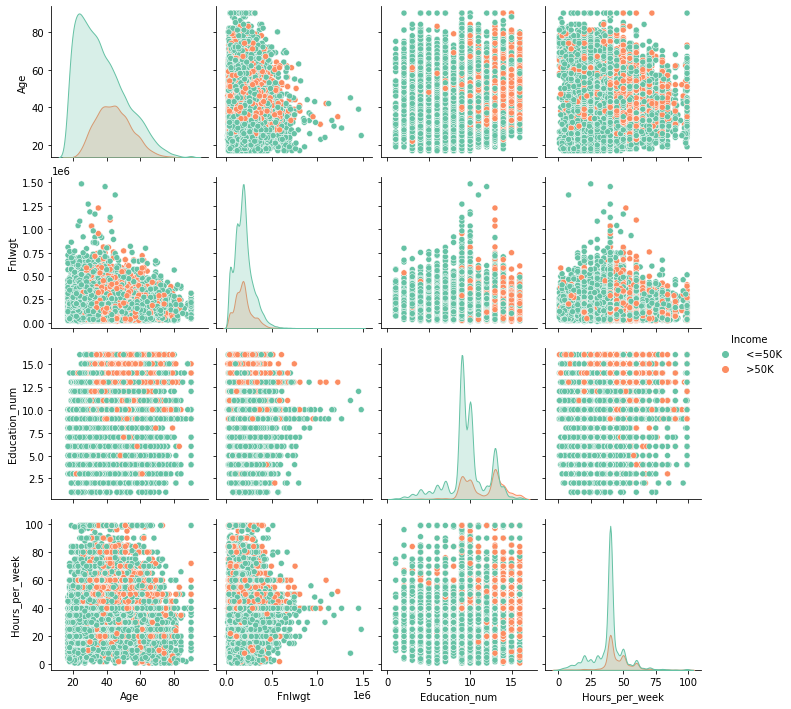

In [43]:
# plotting pairplot to check the relationship with multiple bivariate features
sns.pairplot(df,hue='Income',palette='Set2')
plt.show()

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Income". Here we can observe the relation between the features and label. Most of features are highly correlated with each other. Some of the features have outliers and skewness, will remove them later.

### Outliers

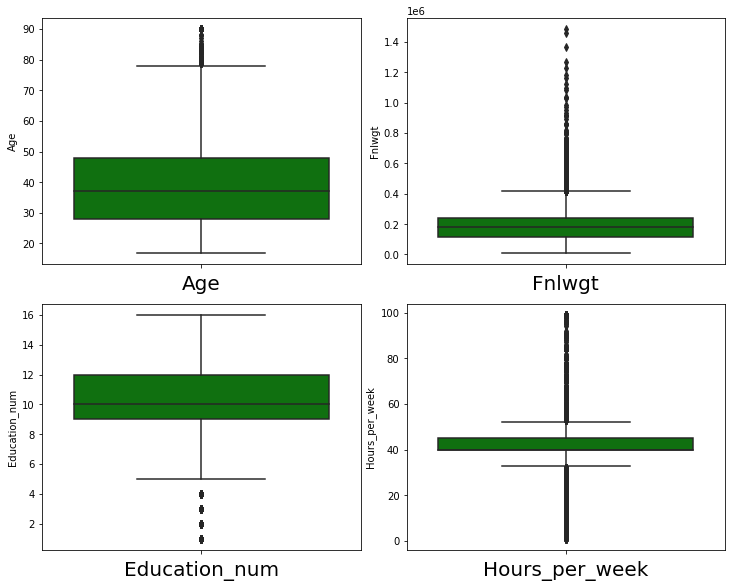

In [44]:
#Let's check the Outliers through Boxplot

plt.figure(figsize=(10,8), facecolor='white')
plotnumber = 1

for column in Num_data:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(y=column, data=df,color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

All columns has outliers. Let's remove it through ZScore method

##### Removing outliers using Zscore

In [10]:
# Features containing outliers
df1 = df[["Age","Fnlwgt","Education_num","Hours_per_week"]]

In [11]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(df1))

# Creating new dataframe
new_df=df[(z<3).all(axis=1)]
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [49]:
df.shape

(32536, 13)

In [50]:
new_df.shape

(31442, 13)

In [51]:
# Let's check the the data loss
data_loss = (32536-31442)/32536*100
data_loss

3.362429309073027

In [12]:
df=new_df.copy() # Reassigning the changed dataframe name to our original dataframe name

### Skewness

In [53]:
# Checking the skewness
df.skew()

Age               0.472290
Fnlwgt            0.635776
Education_num    -0.159303
Hours_per_week   -0.340717
dtype: float64

From above table, we can see some skewness on features Fnlwgt. Let's visualise this through Dist plot

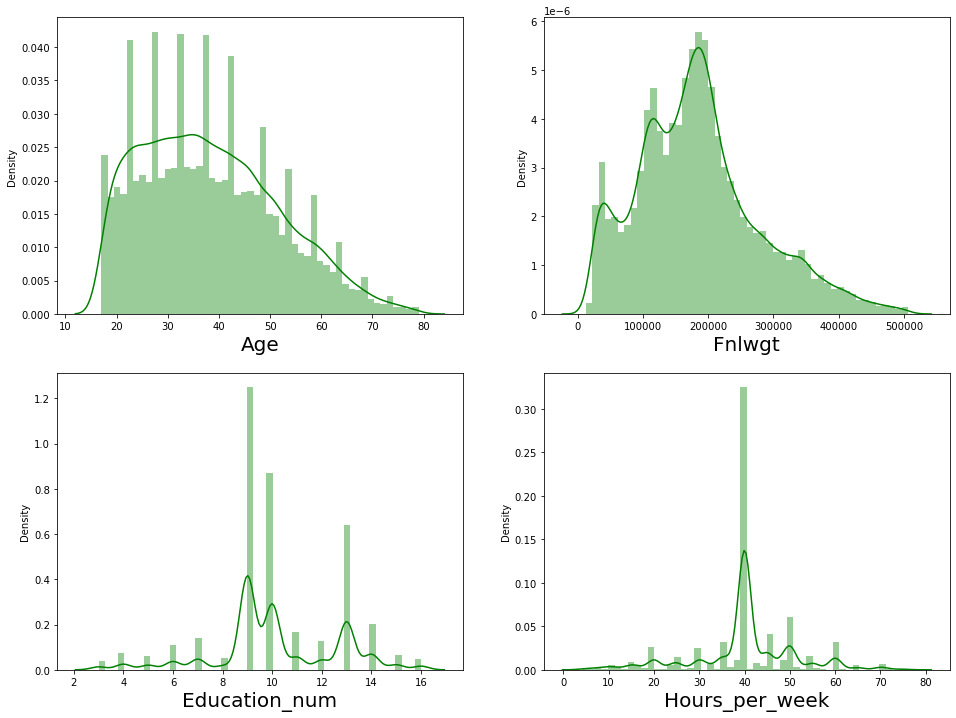

In [54]:
#Checking the skewness through Dist plot

plt.figure(figsize=(16,12), facecolor='white')
plotnumber = 1

for column in Num_data:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

##### Removing skewness through yeo-johnson

In [13]:
# Removing skewness by using yeo-johnson method on Numerical data

from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [14]:
feature = ['Fnlwgt']
df[feature] = scaler.fit_transform(df[feature].values)


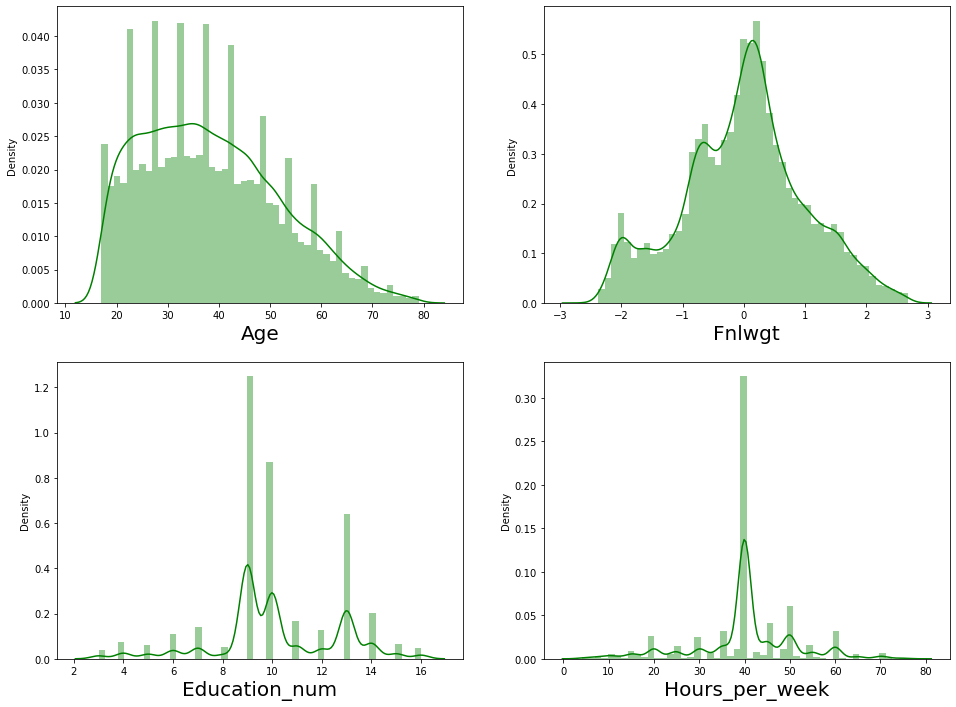

In [58]:
#Checking the skewness through Dist plot after applying power transform

plt.figure(figsize=(16,12), facecolor='white')
plotnumber = 1

for column in Num_data:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

### Encoding

##### Encoding the categorical columns using Label Encoding

In [15]:
Catg_data = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[Catg_data]= df[Catg_data].apply(le.fit_transform)

In [61]:
df[Catg_data]


,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,6,8,2,3,0,4,1,39,0
1,4,10,0,5,1,4,1,39,0
2,4,1,2,5,0,2,1,39,0
3,4,8,2,10,5,2,0,4,0
4,4,11,2,3,5,4,0,39,0
...,...,...,...,...,...,...,...,...,...
32555,4,6,2,13,5,4,0,39,0
32556,4,10,2,6,0,4,1,39,1
32557,4,10,6,0,4,4,0,39,0
32558,4,10,4,0,3,4,1,39,0


### Correlation

In [62]:
cor = df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.008606,-0.066464,-0.000284,0.053365,-0.286105,-0.006725,-0.268033,0.030646,0.091687,0.097148,-0.000271,0.248289
Workclass,0.008606,1.000000,-0.014813,0.000663,-0.009071,-0.020708,-0.000536,-0.059720,0.051420,0.075102,0.048664,-0.008874,0.002453
Fnlwgt,-0.066464,-0.014813,1.000000,-0.024081,-0.033439,0.027481,0.001874,0.008320,-0.008317,0.025406,-0.015655,-0.063374,-0.004677
Education,-0.000284,0.000663,-0.024081,1.000000,0.355997,-0.039211,-0.034712,-0.015222,0.015586,-0.024823,0.061843,0.069708,0.077568
Education_num,0.053365,-0.009071,-0.033439,0.355997,1.000000,-0.065661,0.094507,-0.102662,0.030889,0.016791,0.160668,0.047763,0.337717
Marital_status,-0.286105,-0.020708,0.027481,-0.039211,-0.065661,1.000000,0.027849,0.185709,-0.067520,-0.127402,-0.197411,-0.020137,-0.198372
Occupation,-0.006725,-0.000536,0.001874,-0.034712,0.094507,0.027849,1.000000,-0.040118,-0.003306,0.043842,-0.003743,-0.007371,0.045010
Relationship,-0.268033,-0.059720,0.008320,-0.015222,-0.102662,0.185709,-0.040118,1.000000,-0.115150,-0.583051,-0.263300,-0.009647,-0.251529
Race,0.030646,0.051420,-0.008317,0.015586,0.030889,-0.067520,-0.003306,-0.115150,1.000000,0.088781,0.045393,0.136651,0.072467
Sex,0.091687,0.075102,0.025406,-0.024823,0.016791,-0.127402,0.043842,-0.583051,0.088781,1.000000,0.238892,-0.002005,0.216677


Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

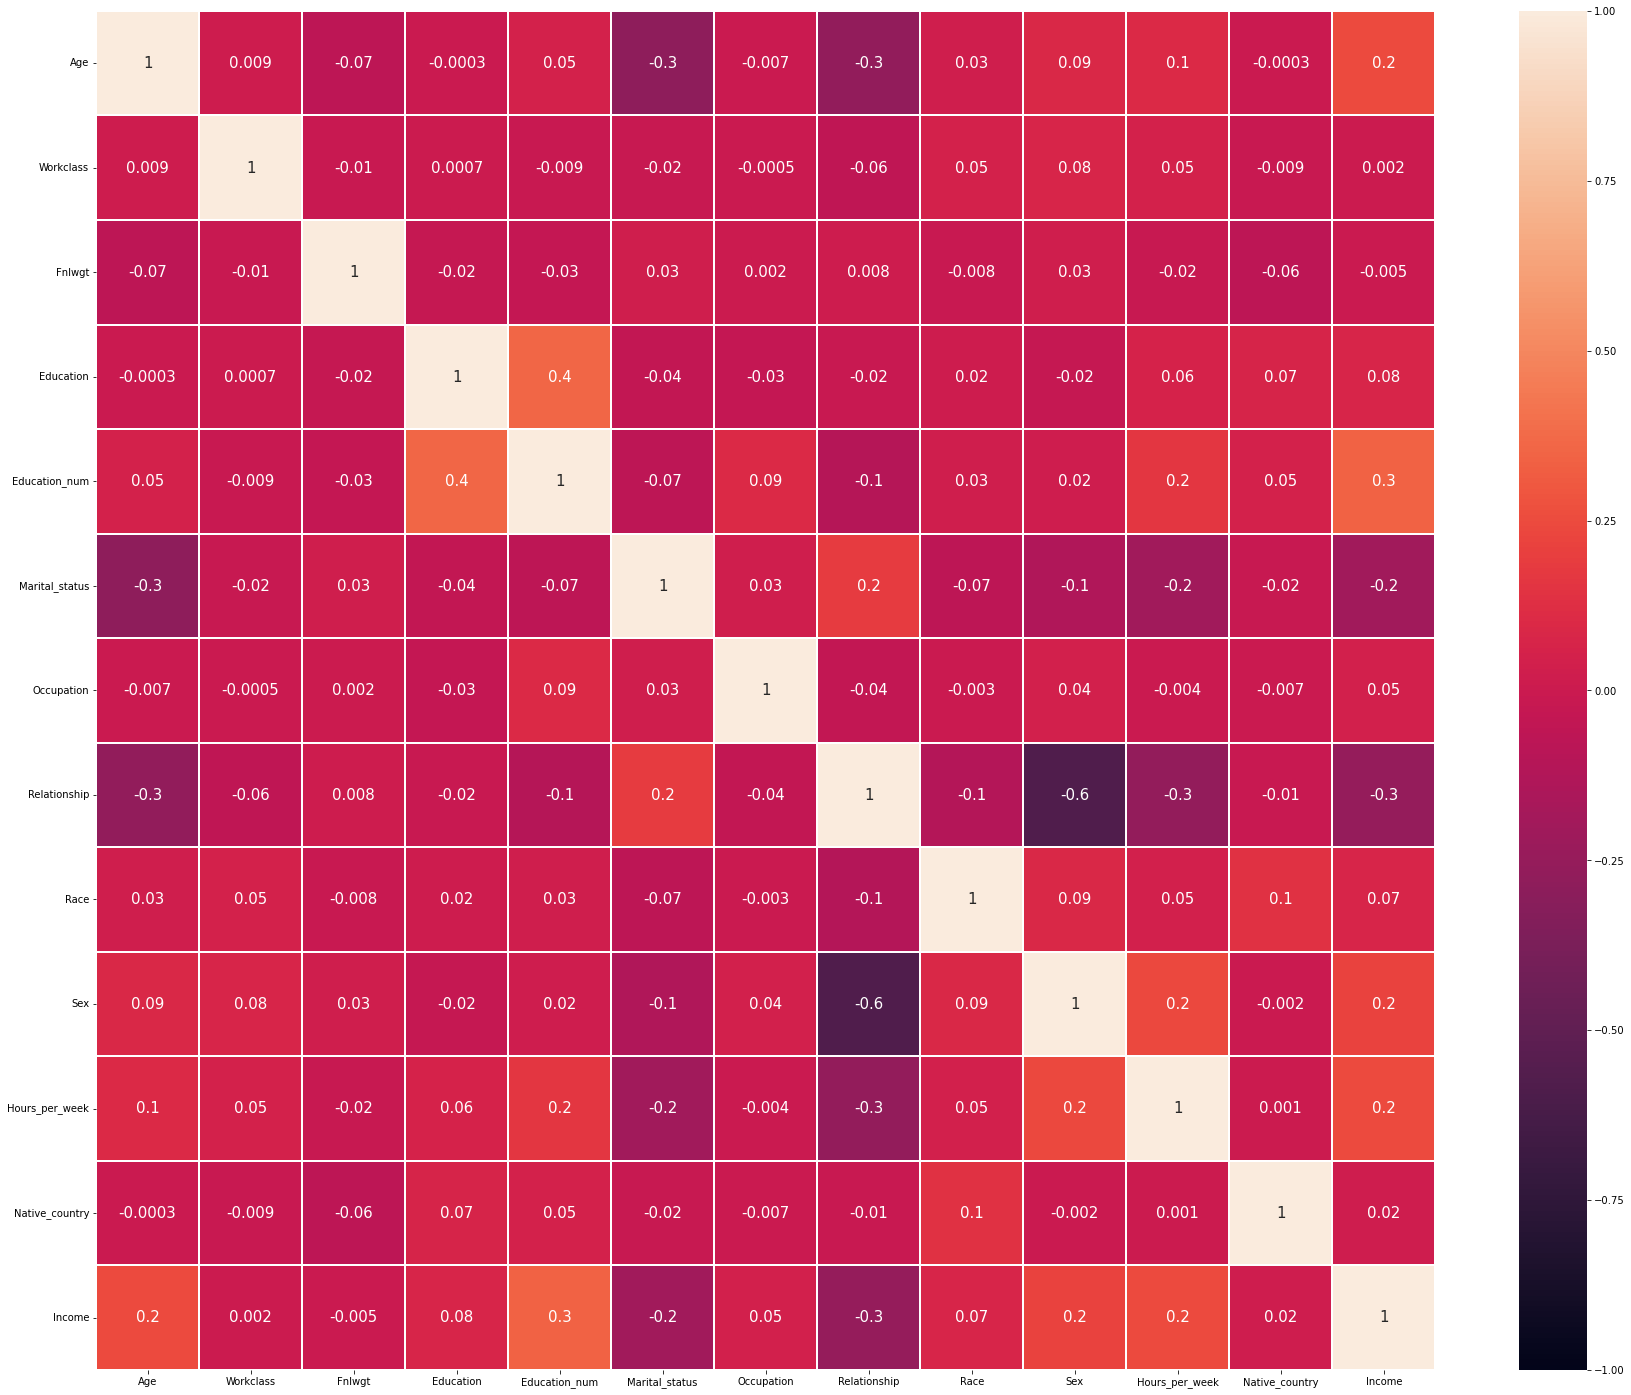

In [63]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, annot_kws={'size':15})
plt.yticks(rotation=0);

Above Heatmap contains both positive and Negative correlation. There is no multicollinearity issue we can see

In [64]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.337717
Age               0.248289
Hours_per_week    0.242352
Sex               0.216677
Education         0.077568
Race              0.072467
Occupation        0.045010
Native_country    0.016675
Workclass         0.002453
Fnlwgt           -0.004677
Marital_status   -0.198372
Relationship     -0.251529
Name: Income, dtype: float64

##### Visualizing the correlation between label and features using bar plot

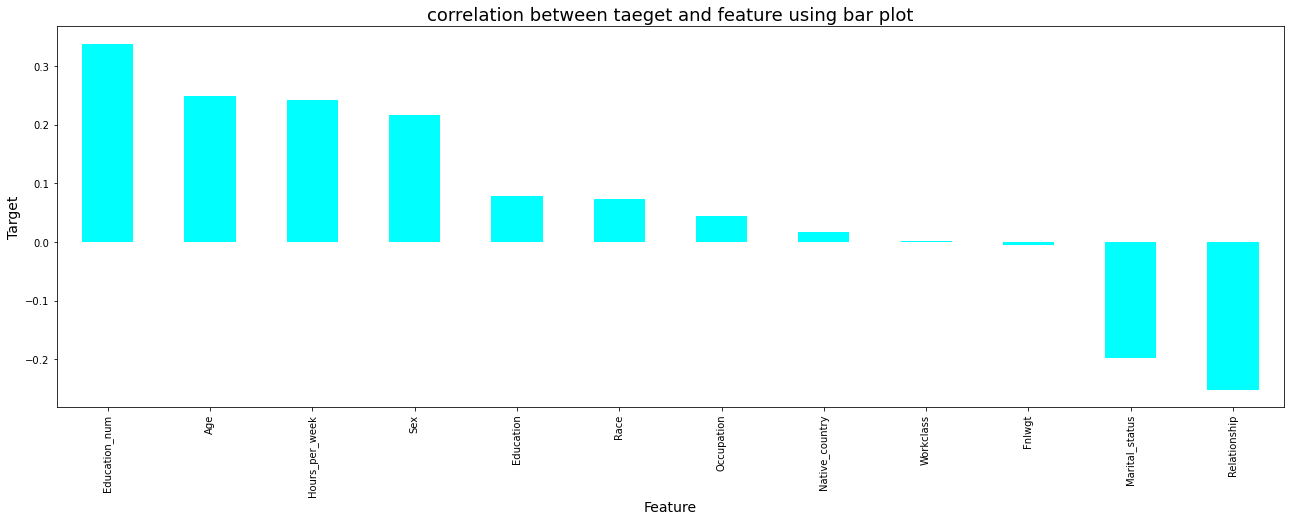

In [66]:
plt.figure(figsize=(22,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='cyan')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between taeget and feature using bar plot',fontsize=18)
plt.show()

The column Fnlwgt has very less negative correlation with the label so we can drop it.

In [17]:
df.drop("Fnlwgt",axis=1,inplace=True)

### Data preprocessing

##### Separating the independent and target variables into x and y

In [18]:
x = df.drop('Income', axis=1)
y = df['Income']

In [69]:
y.value_counts()

0    23836
1     7606
Name: Income, dtype: int64

##### Oversampling

In [19]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [71]:
y.value_counts()

0    23836
1    23836
Name: Income, dtype: int64

From above count, we can see our data is balanced now.

##### Scaling data with standard scaler

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.773887,1.561774,-0.424016,0.962023,-0.302816,-0.806530,-0.717082,0.373240,0.625876,-2.641482,0.275784
1,-0.176092,0.082200,0.226957,-0.642398,-1.830823,-0.347022,-0.099527,0.373240,0.625876,-0.153454,0.275784
2,1.011382,0.082200,-2.702421,-1.444608,-0.302816,-0.347022,-0.717082,-2.126846,0.625876,-0.153454,0.275784
3,-0.967741,0.082200,-0.424016,0.962023,-0.302816,0.801749,2.370691,-2.126846,-1.597761,-0.153454,-5.282999
4,-0.255257,0.082200,0.552443,1.363129,-0.302816,-0.806530,2.370691,0.373240,-1.597761,-0.153454,0.275784


This is our scaled data using standard scaler.

## Modeling

##### Finding best random state

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [22]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8389036498391833  on Random_state  168


Here we are getting accuracy score of 83.89% with Random state 168

Now splitting the data for Training and Testing purpose. 70% we are considering for Training and 30% for Testing purpose

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

### Logistic Regression

In [24]:
# Checking accuracy score for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7492658369458817
[[5164 1995]
 [1591 5552]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      7159
           1       0.74      0.78      0.76      7143

    accuracy                           0.75     14302
   macro avg       0.75      0.75      0.75     14302
weighted avg       0.75      0.75      0.75     14302



### KNeighbors Classifier

In [25]:
# Checking accuracy score for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.836456439658789
[[5652 1507]
 [ 832 6311]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      7159
           1       0.81      0.88      0.84      7143

    accuracy                           0.84     14302
   macro avg       0.84      0.84      0.84     14302
weighted avg       0.84      0.84      0.84     14302



### Decision Tree Classifier

In [26]:
# Checking accuracy score for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8374353237309468
[[5847 1312]
 [1013 6130]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      7159
           1       0.82      0.86      0.84      7143

    accuracy                           0.84     14302
   macro avg       0.84      0.84      0.84     14302
weighted avg       0.84      0.84      0.84     14302



### Random Forest Classifier

In [27]:
# Checking accuracy score for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8698084184030206
[[6057 1102]
 [ 760 6383]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7159
           1       0.85      0.89      0.87      7143

    accuracy                           0.87     14302
   macro avg       0.87      0.87      0.87     14302
weighted avg       0.87      0.87      0.87     14302



### Support Vector Machine Classifier

In [28]:
# Checking accuracy score for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8286952873723955
[[5491 1668]
 [ 782 6361]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      7159
           1       0.79      0.89      0.84      7143

    accuracy                           0.83     14302
   macro avg       0.83      0.83      0.83     14302
weighted avg       0.83      0.83      0.83     14302



### Gradient Boosting Classifier

In [29]:
# Checking accuracy score for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8398126136204727
[[5692 1467]
 [ 824 6319]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      7159
           1       0.81      0.88      0.85      7143

    accuracy                           0.84     14302
   macro avg       0.84      0.84      0.84     14302
weighted avg       0.84      0.84      0.84     14302



### AdaBoost Classifier

In [30]:
# Checking accuracy score for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.8240805481750804
[[5607 1552]
 [ 964 6179]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      7159
           1       0.80      0.87      0.83      7143

    accuracy                           0.82     14302
   macro avg       0.83      0.82      0.82     14302
weighted avg       0.83      0.82      0.82     14302



#### Checking the cross validation score

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.7463711856630133


In [33]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.834956556002644


In [34]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8348729911956975


In [35]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8682261008513235


In [36]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.8244051609403004


In [37]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.8346838456003622


In [38]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.821447284022771


From the above observation, looking at the accuracy score and the cross validation score we conclude that KNN Classifier is our best fitting model

### Hyperparameter tuning

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
#KNN Classifier
parameters = {'n_neighbors':[2,3,4,5,6],
              'weights':['uniform','distance'],
              'leaf_size':[10,100],
              'algorithm':['auto','ball_tree','kd_tree','brute']}

In [41]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [42]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 100], 'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [43]:
GCV.best_params_

{'algorithm': 'brute',
 'leaf_size': 10,
 'n_neighbors': 6,
 'weights': 'distance'}

In [44]:
Income = KNN(algorithm='brute', leaf_size=10, n_neighbors=6, weights='distance')
Income.fit(x_train, y_train)
pred = Income.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

84.35183890364983


After tuning model accuracy increased to 84.35%

#### Plotting ROC and Compare AUC for the best model

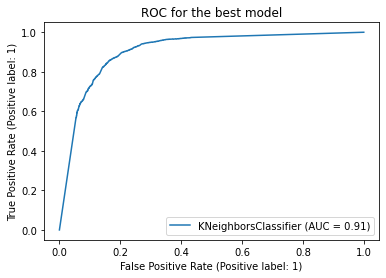

In [46]:
# Let's check the Auc for the best model after hyper parameter tuning
from sklearn.metrics import plot_roc_curve 

plot_roc_curve(Income, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

Here I have generated the ROC Curve for final model and it shows the AUC score for my final model 91%

## Saving the model

In [50]:
# Saving the model using .pkl
import joblib
joblib.dump(Income,"Census Income Prediction.pkl")

['Census Income Prediction.pkl']

##### Predicting the saved model

In [53]:
# Loading the saved model
model=joblib.load("Census Income Prediction.pkl")

#Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,0,1
...,...,...
14297,0,0
14298,0,0
14299,1,1
14300,1,1


# Conclusion

The objective is to predict whether a person makes over $50K a year, we have explored various Classification technique and found KNeighborsClassifier predicts the best result. 